Objetivo: Resolução lista 1 de otimização e programação linear

In [1]:
import Pkg

In [2]:
# Pkg.add("Plots")    # Adding plots package
# Pkg.add("JuMP")    # Adding plots package
# Pkg.add("GLPK")    # Adding plots package
# Pkg.add("CSV")    # Adding plots package
# Pkg.add("DataFrames")    # Adding plots package
# Pkg.add("GLM")    # Linear Regression package
# HiGHS need to explicity pass the version. Otherwise its installing the older version
# Pkg.add(Pkg.PackageSpec(;name="HiGHS", version="1.9.0"))
# Pkg.add("QuantReg")
# Pkg.add("MosekTools")
# Pkg.add("Ipopt")
# Pkg.add("Random")

In [3]:
using Plots
using JuMP
using GLPK
using CSV
using DataFrames
using GLM
using HiGHS
# using QuantReg
# Different optimizer to use in quadratic optimization problemns
# using MosekTools
using Ipopt
using Random
using SparseArrays

# Inicializa o backend dos plots
gr()

Plots.GRBackend()

## Summary:


### Problema 1 -

In [4]:
A = [
2 1 1 0;
1 2 0 1
]
b = [
4; 4
]
c = [4 3 0 0]

1×4 Matrix{Int64}:
 4  3  0  0

In [5]:
# Dicionario 3 -
Nbase = [3, 4] 
base = [1, 2]

N = A[:,Nbase]
B = A[:,base]
cn = c[:,Nbase]
cb = c[:,base]
cn - cb*inv(B)*N

1×2 Matrix{Float64}:
 -1.66667  -0.666667

In [6]:
import Pkg

# Pkg.add("Random")

using Random
using SparseArrays

# Simplex fase 2
function simplex_fase2(A,b,c,Nbase,Bbase,max_iter, tolerance)
    m, n = size(A)
    k = n - m # número de variáveis não básicas (igual ao número de variáveis menos o número de restrições, 
    # sendo que cada restrição é uma variável básica)
    
    iter = 0
    status = -1    # não iniciado
    # Começo do loop
    while(iter<=max_iter)
        iter+=1
        println("iter:",iter)
        #B = view(A,:,Bbase)
        #N = view(A,:,Nbase)
        
        B = 1.0*A[:,Bbase]
        N = 1.0*A[:,Nbase]
        # Colocar os views, view evita a criação de uma nova matriz em outro bloco de memoria
        #apenas faz referencia aos endereco de memoria da matriz original
        cB = 1.0*c[Bbase]
        cN = 1.0*c[Nbase]
    
        println("B:",B)
        println("N:",N)
        println("Nbase:",Nbase)
        println("Bbase:",Bbase)

        x = zeros(n)
        
        xB = inv(B)*b
        println("xb", xB)
        x[Bbase] = xB
        println("x", x)
        if minimum(xB) < 0
            println("solução inicial inviável encontrada")
            return NaN,[],status,iter
        end
        # Calcular o custo reduzido
        y = (cB')*inv(B)
        cred = cN' - y*N
        println("Custo Reduzido:", cred)
        z = y*b
        v,j = findmax(cred') #j é a variavel não básica que candidata a entrada na base
        if v <= 0
            println("Ótimo Encontrado")
            status = 1
            println("Melhor custo:", z)
            x = zeros(n)
            x[Bbase] = xB
            return z,x,status,iter,Bbase,Nbase
        end
        #troca de base
        dB = B\N[:,j]
        r = Inf
        i = 0

        for ii in 1:m
            if dB[ii] > 0 && xB[ii]/dB[ii] < r
                r = xB[ii]/dB[ii]
                i = ii
            end
        end

        #verificar se o problema é ilimitado
        if i == 0
            status = 0 # problema ilimitado
            println("ilimitado")
            return Inf,[], status,iter, Bbase, Nbase
        end

        # Atualizar a base

        aux = Bbase[i]
        Bbase[i] = Nbase[j]
        Nbase[j] = aux

        # fim do loop
    end
    return NaN,[],status,iter
end

# Testes
function tests_main()

    max_iter =1000
    # Problema da produção original
    print("Testando o algoritmo para o: Problema dual da produção\n")
    A = 1.0*[
        -2 -1 1 0; 
        -1 -2 0 1
    ]
    c = 1.0*[
        -4; -4 ; 0; 0
    ]
    b= 1.0*[
        -4;
        -3
    ]
    m, n = size(A)
    k = n - m
    Nbase = collect(1:k)
    Bbase = collect(k+1:n)
    z, x, status, iter, Bbase, Nbase = simplex_fase2(A,b,c,Nbase,Bbase,max_iter, 1)
    print(repeat("-", 200), "\n")

end

tests_main()

Testando o algoritmo para o: Problema dual da produção
iter:1
B:[1.0 0.0; 0.0 1.0]
N:[-2.0 -1.0; -1.0 -2.0]
Nbase:[1, 2]
Bbase:[3, 4]
xb[-4.0, -3.0]
x[0.0, 0.0, -4.0, -3.0]
solução inicial inviável encontrada


LoadError: BoundsError: attempt to access Tuple{Float64, Vector{Any}, Int64, Int64} at index [5]

# Problema 2 - 

In [23]:
# Solução básica 1
A = [
1 1 -1 0 0;
1 0 0 1 0;
0 1 0 0 1;
]
b = [1, 2, 3] 
Nb = [4, 5] 

B = A[:, b]
N = A[:, Nb]


-inv(B)*N

3×2 Matrix{Float64}:
 -1.0   0.0
  0.0  -1.0
 -1.0  -1.0

In [24]:
# Solução básica 2
A = [
1 1 -1 0 0;
1 0 0 1 0;
0 1 0 0 1;
]
b = [1, 2, 5] 
Nb = [3, 4] 

B = A[:, b]
N = A[:, Nb]

-inv(B)*N

3×2 Matrix{Float64}:
  0.0  -1.0
  1.0   1.0
 -1.0  -1.0

In [25]:
# Solução básica 3
A = [
1 1 -1 0 0;
1 0 0 1 0;
0 1 0 0 1;
]
b = [1, 2, 4] 
Nb = [3, 5] 

B = A[:, b]
N = A[:, Nb]

-inv(B)*N

3×2 Matrix{Float64}:
  1.0   1.0
  0.0  -1.0
 -1.0  -1.0

Letra c

In [ ]:
#
A = [
1 1 1
    ]

# Problema 4

In [14]:
A = [2 1 1 0;
    1 2 0 1
]
b = [4;
    4]
c = [4 3 0 0]

2-element Vector{Int64}:
 4
 4

In [73]:
# Base no ponto otimo
Nbase = [3, 4]
base = [1, 2]
B = A[:, base]
N = A[:, Nbase]
cb = c[:,base]
cn = c[:,Nbase]

1×2 Matrix{Int64}:
 0  0

In [118]:
inv(B)

2×2 Matrix{Float64}:
  0.666667  -0.333333
 -0.333333   0.666667

In [75]:
4*0.666667 - 4*0.333333 >= 0

4*-0.33333 + 4*0.666667 >= 0

true

In [76]:
function func_1(x)
    y = (0.666667/0.33333333)*x
end

function func_2(x)
    y = (0.33333333/0.666667)*x
end

func_2 (generic function with 1 method)

In [62]:
x = [-4:0.1:5;]

91-element Vector{Float64}:
 -4.0
 -3.9
 -3.8
 -3.7
 -3.6
 -3.5
 -3.4
 -3.3
 -3.2
 -3.1
 -3.0
 -2.9
 -2.8
  ⋮
  3.9
  4.0
  4.1
  4.2
  4.3
  4.4
  4.5
  4.6
  4.7
  4.8
  4.9
  5.0

In [65]:
y_1 = func_1.(x)
y_2 = func_2.(x)

91-element Vector{Float64}:
 -1.9999989800005098
 -1.949999005500497
 -1.8999990310004842
 -1.8499990565004716
 -1.7999990820004588
 -1.7499991075004462
 -1.6999991330004334
 -1.6499991585004206
 -1.599999184000408
 -1.5499992095003952
 -1.4999992350003823
 -1.4499992605003695
 -1.3999992860003567
  ⋮
  1.949999005500497
  1.9999989800005098
  2.049998954500522
  2.0999989290005354
  2.149998903500548
  2.199998878000561
  2.2499988525005734
  2.299998827000586
  2.349998801500599
  2.399998776000612
  2.4499987505006247
  2.499998725000637

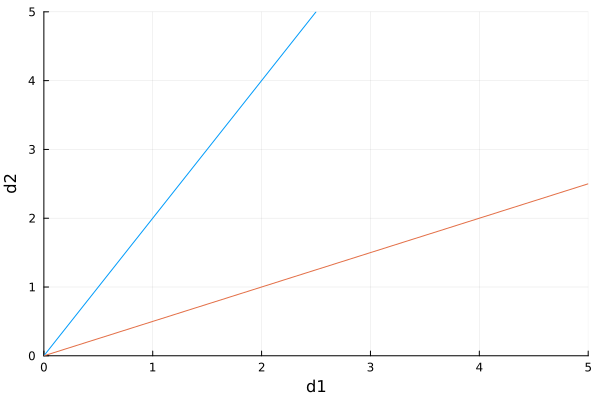

In [71]:
plot(x, y_1, ylimits=(0,5), label="", xlimits=(0,5))
plot!(x, y_2, ylimits=(0,5), label="", xlimits=(0,5))
plot!(xaxis="d1", yaxis="d2")

Um aumento no valor do acrescimo delta da segunda restribução, impacta a função objetivo da forma 

In [96]:
b_2 = 4

function func(b_2)
    b = [4; b_2]
    z = cb*inv(B)*b
    z = z[1]
end

func (generic function with 1 method)

In [113]:
b_2 = [0:0.1:30;]

301-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 28.9
 29.0
 29.1
 29.2
 29.3
 29.4
 29.5
 29.6
 29.7
 29.8
 29.9
 30.0

In [114]:
z = func.(b_2)

301-element Vector{Float64}:
  6.666666666666666
  6.733333333333333
  6.799999999999999
  6.866666666666665
  6.933333333333333
  7.0
  7.0666666666666655
  7.133333333333333
  7.199999999999999
  7.2666666666666675
  7.333333333333332
  7.3999999999999995
  7.466666666666667
  ⋮
 25.93333333333333
 26.0
 26.06666666666667
 26.133333333333333
 26.199999999999996
 26.266666666666666
 26.333333333333336
 26.4
 26.46666666666666
 26.53333333333334
 26.6
 26.666666666666664

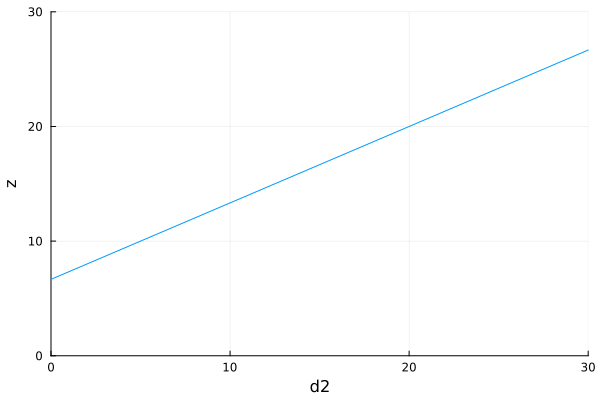

In [117]:
plot(b_2, z, ylimits=(0,30), label="", xlimits=(0,30))
plot!(xaxis="d2", yaxis="z")

# Problema 5

In [160]:
# Definindo

A = [
2 1 2 1 0;
1 2 2 0 1
]
b = [
4; 4
]
c = [4; 3; 4.7; 0; 0]

5-element Vector{Float64}:
 4.0
 3.0
 4.7
 0.0
 0.0

In [161]:
# Base no ponto otimo
Nbase = [3, 4, 5]
base = [1, 2]
B = A[:, base]
N = A[:, Nbase]
cb = c[base]
cn = c[Nbase]

3-element Vector{Float64}:
 4.7
 0.0
 0.0

In [162]:
(cb')*inv(B)*N

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 4.66667  1.66667  0.666667

In [165]:
y*N

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 4.66667  1.66667  0.666667

In [166]:
y = (cb')*inv(B)
cred = cn' - y*N

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.0333333  -1.66667  -0.666667